# INSTAGRAM INFLUENCERS 
    
        Load the instagram influencers dataset and answer the following FIVE questions, these questions will help us understand various data processing techniques
        1 Dealing with various datatypes and type conversion of features
        2 Find the correlation between the columns
        3 Finding the data distributions of columns
        4 Understanding aggregate functions of dataframes
        5 Understanding the relation between columns

LOADING THE DATASET TO HAVE BASIC IDEA BEFORE ANSWERING QUESTIONS

In [2]:
import pandas as pd
Insta_DF=pd.read_csv(r"C:\Users\91939\OneDrive\Desktop\Mentor_P8\DATASETS\INSTAGRAM_INFLUENCERS.csv")
Insta_DF.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [3]:
Insta_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


DEALING WITH DATA TYPES, TYPE CONVERTING TO APPROPRIATE DATA TYPES

In [11]:
import pandas as pd
import re

def convert_to_numeric(x):
    if isinstance(x, str):
        x = x.lower().replace('b','000000000').replace('m','000000').replace('k','000')
        return float(re.sub(r'[^\d\.\-]', '', x))
    else:
        return x
# Convert numeric columns to standard format
Insta_DF['Followers'] = Insta_DF['Followers'].apply(convert_to_numeric)
Insta_DF['Avg. Likes'] = Insta_DF['Avg. Likes'].apply(convert_to_numeric)
Insta_DF['Posts'] = Insta_DF['Posts'].apply(convert_to_numeric)
Insta_DF['60-Day Eng Rate'] = Insta_DF['60-Day Eng Rate'].apply(convert_to_numeric)
Insta_DF['New Post Avg. Likes'] = Insta_DF['New Post Avg. Likes'].apply(convert_to_numeric)
Insta_DF['Total Likes'] = Insta_DF['Total Likes'].apply(convert_to_numeric)


In [14]:
Insta_DF.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2,8.7,3.4,0.013,6.3,29.1,Spain
1,2,kyliejenner,91,370.7,8.2,7.0,0.014,5.0,57.4,United States
2,3,\nleomessi,90,363.9,6.7,915.0,0.010,3.5,6.1,NaN
3,4,\nselenagomez,93,348.8,6.1,1.9,0.005,1.7,11.4,United States
4,5,\ntherock,91,339.4,1.8,6.8,0.003,932.0,12.6,United States


In [15]:
Insta_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                200 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    137 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


## 1 QUESTION
#### Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

## 1 ANSWER
#### Followers and Rank 

### DESCRIPTION

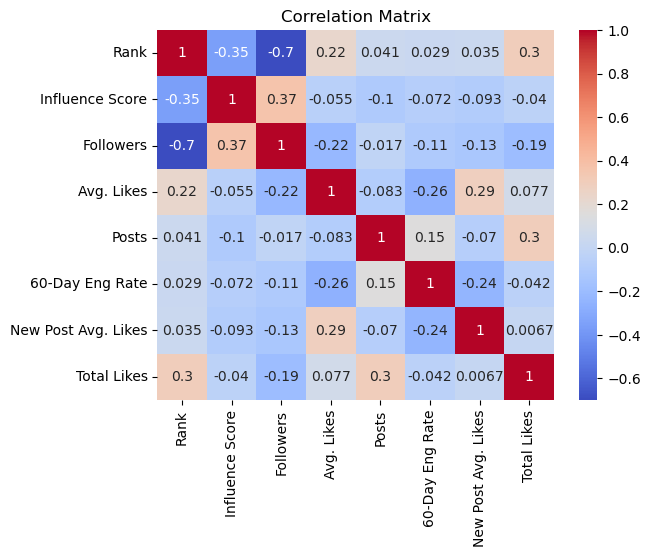

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a correlation matrix
corr_matrix = Insta_DF.corr()
# Plot a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2 QUESTION
#### What is the frequency distribution of the following features?
#### 1) Influence Score
#### 2) Followers
#### 3) Posts

## 2 ANSWER
   #### Influence Score: SKEWED DISTRIBUTION
   #### Followers: SKEWED DISTRIBUTION
   #### Posts: SKEWED DISTRIBUTION
    

### DESCRIPTION

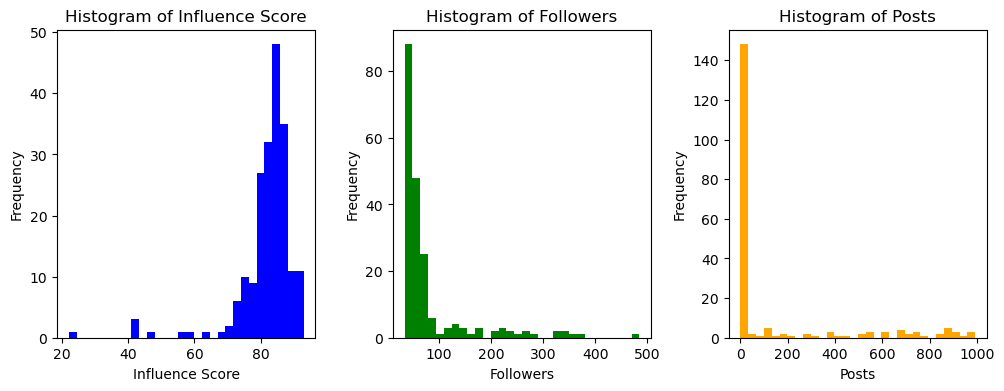

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Example dataset
influence_score = Insta_DF['Influence Score']
followers = Insta_DF['Followers']
posts = Insta_DF['Posts']

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
# Plot the histograms
axs[0].hist(influence_score, bins=30, density=False, color='blue')
axs[0].set_title('Histogram of Influence Score')
axs[0].set_xlabel('Influence Score')
axs[0].set_ylabel('Frequency')

axs[1].hist(followers, bins=30, density=False, color='green')
axs[1].set_title('Histogram of Followers')
axs[1].set_xlabel('Followers')
axs[1].set_ylabel('Frequency')

axs[2].hist(posts, bins=30, density=False, color='orange')
axs[2].set_title('Histogram of Posts')
axs[2].set_xlabel('Posts')
axs[2].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
# Show the plot
plt.show()

In [32]:
for i in ('Influence Score','Followers','Posts'):       
    stat, p = skewtest(Insta_DF[i])
    # Check if p-value is greater than significance level
    alpha = 0.05
    if p > alpha:
        print(i+' is not significantly skewed.')
    else:
        print(i+' is significantly skewed.')

Influence Score is significantly skewed.
Followers is significantly skewed.
Posts is significantly skewed.


## 3 QUESTION
#### Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.
## 3 ANSWER
#### United States with 65 Instagram Influencers


### DESCRIPTION

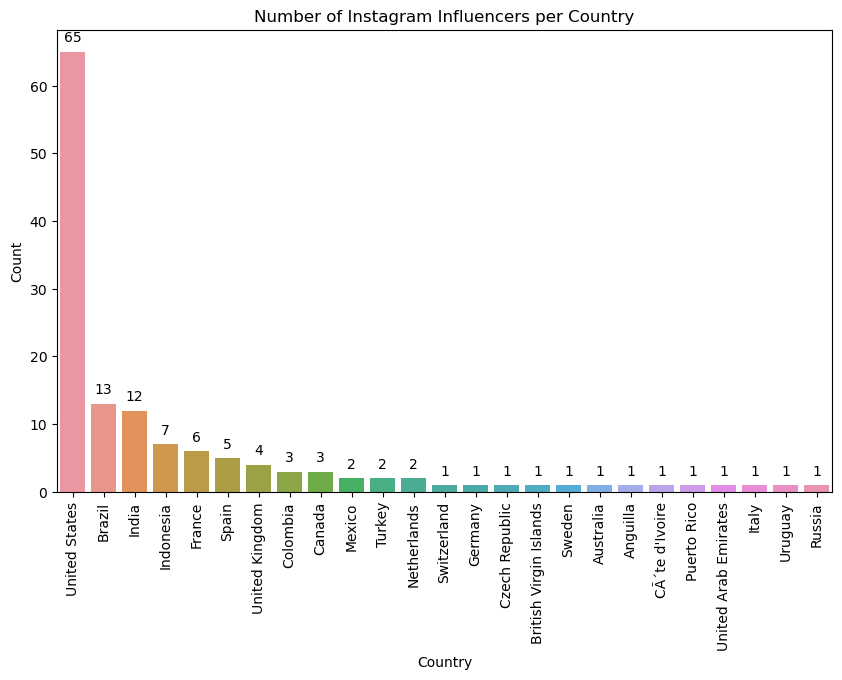

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of influencers per country
country_counts = Insta_DF['Country Or Region'].value_counts()

# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax)
ax.set_title('Number of Instagram Influencers per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.show()


## 4 QUESTION
#### Who are the top 10 influencers in the given dataset based on the following features
#### 1) Followers
#### 2) Average likes
#### 3) Total Likes
## 4 ANSWER
    top_10_followers	top_10_avg_likes	top_10_total_likes
    0	\ncristiano       \nrealmadrid	        \nhrithikroshan
    1	kyliejenner	      \neminem	            \nraisa6690
    2	\nleomessi	      \nranveersingh	    \nantogriezmann
    3	\nselenagomez	  \nsergioramos	        \nvancityreynolds
    4	\ntherock	      \nShakira         	\ndior
    5	\narianagrande	  \ntatawerneck     	\ntheweeknd
    6	\nkimkardashian	  \nbrunamarquezine  	\nlouisvuitton
    7	\nbeyonce	      \nkritisanon      	\nmaisa
    8	\nkhloekardashian  433	                \nsachintendulkar
    9	\njustinbieber	  \nronaldinho	        \nluissuarez9

### DESCRIPTION

In [67]:
# Sort by followers and get top 10
top_10_followers = Insta_DF.sort_values(by='Followers', ascending=False).head(10)
top_10_followers = top_10_followers.set_index(pd.Index(range(10)))
# Sort by avg. likes and get top 10
top_10_avg_likes = Insta_DF.sort_values(by='Avg. Likes', ascending=False).head(10)
top_10_avg_likes = top_10_avg_likes.set_index(pd.Index(range(10)))
# Sort by total likes and get top 10
top_10_total_likes = Insta_DF.sort_values(by='Total Likes', ascending=False).head(10)
top_10_total_likes = top_10_total_likes.set_index(pd.Index(range(10)))

top_10_totals = pd.concat([top_10_followers['Channel Info'], 
                top_10_avg_likes['Channel Info'], 
                top_10_total_likes['Channel Info']], axis=1)
top_10_totals.columns = ['top_10_followers', 'top_10_avg_likes','top_10_total_likes']
top_10_totals

,top_10_followers,top_10_avg_likes,top_10_total_likes
0,\ncristiano,\nrealmadrid,\nhrithikroshan
1,kyliejenner,\neminem,\nraisa6690
2,\nleomessi,\nranveersingh,\nantogriezmann
3,\nselenagomez,\nsergioramos,\nvancityreynolds
4,\ntherock,\nShakira,\ndior
5,\narianagrande,\ntatawerneck,\ntheweeknd
6,\nkimkardashian,\nbrunamarquezine,\nlouisvuitton
7,\nbeyonce,\nkritisanon,\nmaisa
8,\nkhloekardashian,433,\nsachintendulkar
9,\njustinbieber,\nronaldinho,\nluissuarez9


## 5 QUESTION
#### Describe the relationship between the following pairs of features using a suitable graph
#### a) Followers and Total Likes
#### b) Followers and Influence Score
#### c) Posts and Average likes
#### d) Posts and Influence Score
## 5 ANSWER
#### a) Followers and Total Likes
#### There is no statistically significant correlation.
#### b) Followers and Influence Score 
#### There is a moderate positive correlation.(if followers increases then inluence score increases)
#### c) Posts and Average likes
#### There is no statistically significant correlation.
#### d) Posts and Influence Score
#### There is no statistically significant correlation.

### DESCRIPTION

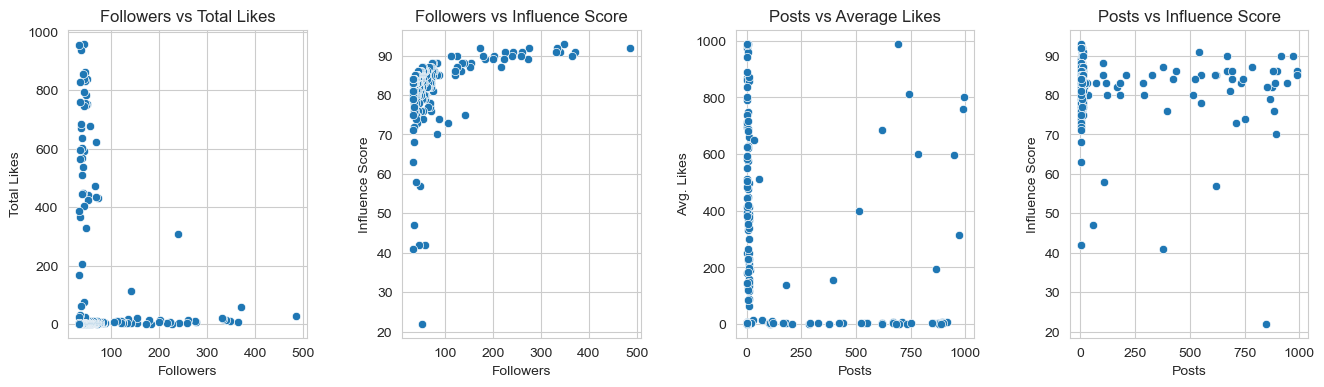

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create the scatter plot of Followers vs Total Likes
sns.scatterplot(ax=axes[0], x="Followers", y="Total Likes", data=Insta_DF)
axes[0].set_title("Followers vs Total Likes")

# Create the scatter plot of Followers vs Influence Score
sns.scatterplot(ax=axes[1], x="Followers", y="Influence Score", data=Insta_DF)
axes[1].set_title("Followers vs Influence Score")

# Create the scatter plot of Posts vs Average Likes
sns.scatterplot(ax=axes[2], x="Posts", y="Avg. Likes", data=Insta_DF)
axes[2].set_title("Posts vs Average Likes")

# Create the scatter plot of Posts vs Influence Score
sns.scatterplot(ax=axes[3], x="Posts", y="Influence Score", data=Insta_DF)
axes[3].set_title("Posts vs Influence Score")

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)

# Save the plot as an image
plt.savefig("insta_df_scatter_subplots.png")


In [97]:
from scipy.stats import spearmanr

# Define the pairs of column names to compute the Spearman correlation coefficient
data = [["Followers","Total Likes"],["Followers", "Influence Score"],["Posts","Avg. Likes"],["Posts","Influence Score"]]

# Loop through the pairs of column names and compute the Spearman correlation coefficient and p-value
for pair in data:
    col1 = pair[0]
    col2 = pair[1]
    corr_coef, p_value = spearmanr(Insta_DF[col1], Insta_DF[col2])
    
    # Print the correlation coefficient and p-value
    print('The Spearman correlation coefficient between', col1, 'and', col2, 'is:', corr_coef)
    print('The p-value is:', p_value)
    
    # Check the strength of the correlation based on the p-value
    if p_value < 0.05:
        if corr_coef >= 0.7:
            print('There is a strong positive correlation.')
        elif 0.3 <= corr_coef < 0.7:
            print('There is a moderate positive correlation.')
        elif -0.3 <= corr_coef < 0.3:
            print('There is a weak or no correlation.')
        elif -0.7 <= corr_coef < -0.3:
            print('There is a moderate negative correlation.')
        else:
            print('There is a strong negative correlation.')
    else:
        print('There is no statistically significant correlation.')
    print()  # Print an empty line to separate the output for different pairs of column names


The Spearman correlation coefficient between Followers and Total Likes is: 0.07079135936994795
The p-value is: 0.3191937207214764
There is no statistically significant correlation.

The Spearman correlation coefficient between Followers and Influence Score is: 0.5733527535176081
The p-value is: 7.127215769707509e-19
There is a moderate positive correlation.

The Spearman correlation coefficient between Posts and Avg. Likes is: 0.10900307881547591
The p-value is: 0.12442666878538813
There is no statistically significant correlation.

The Spearman correlation coefficient between Posts and Influence Score is: 0.02345038743113195
The p-value is: 0.7416983164010787
There is no statistically significant correlation.

